# Table of Contents

**Introduction**

An explanation of the purpose of this project, and what is done with the dataset. 

**Section 1: Opening the data file and studying the general information**

Details of the columns of the dataset, specifically the names, non-null values counts of each column, and the data type of each column. 

**Section 2: Preparing the data**

Changing all column names to snake_case, checking for duplicates, dropping columns that are not useful for the analysis, and deciding what to do with null values.

**Section 3: Analyzing the data**

Deciding which data to use, finding the total video game sales per year of contemporary platforms, finding the variations in global video games between contemporary platforms, finding the average global video game sales of each contemporary platform, determining if reviews from users and/or critics correlate with total sales, investigating if games released on multiple platforms sell equally well on each platform or not, and comparing the distributions of sales between various video game genres.

**Section 4: Creating a user profile for NA, EU, & JP**

Figuring out the top 5 best selling video game platforms and genres in each of the following regions: North America, Europe, and Japan. Also, figuring out the extent to which ESRB ratings affect video game sales in North America.

**Section 5: Hypothesis Testing**

Using two-tailed tests to investigate the following hypotheses: (1) Average user ratings of the Xbox One and PC platforms are the same, and (2) Average user ratings for the Action and Sports genres are different.

**Section 6: Conclusions**

Practical takeaways for Ice stakeholders to help them with anticipating the best selling games of 2017.

# Introduction
It is December 2016, and I work for the online, worldwide video game store **Ice**. 

**Ice** stakeholders are interested in identifying patterns in their sales dataset to help predict whether or not a game is likely to be successful. They want to anticipate who the biggest winners in 2017 will be, and plan their advertising campaigns accordingly.

The sales dataset has the following column names:

— Name (of the video game)

— Platform (e.g. PS4, XOne, WiiU, etc.)

— Year_of_Release

— Genre (e.g. Fighting, Racing, Sports, etc.)

— NA_sales (North American sales in USD million)

— EU_sales (European sales in USD million)

— JP_sales (Japanese sales in USD million)

— Other_sales (Total sales in all other countries in USD million)

— Critic_Score (On a scale of 0 to 100)

— User_Score (On a scale of 0 to 10)

— Rating (ESRB, e.g. E, T, M, etc.)

To help me arrive at reasonable and useful conclusions, I did the following with the dataset:

(1) Preprocessed the data by making the column names lowercase, changing the data types of the columns as needed, deciding what to do with the missing values, and calculating the total sales for each game.

(2) Analyzed the data by determining the degree of significance of the various variables. Multiple plots of different types (histogram, box plot, scatter plot, etc.) were made to visualize significant patterns found in the dataset.

(3) Created a user profile for the following regions: North America, Europe, and Japan. The purpose of this is to determine the top selling platforms, the top selling video game genres, and the effect of ESRB ratings on sales (if any). 

(4) Statistical hypothesis testing regarding user ratings on different platforms and video game genres.

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Section 1: Opening the data file and studying the general information

In [2]:
video_games_data = pd.read_csv('/datasets/games.csv')

In [3]:
video_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Section 2: Preparing the data

It is conventional for all column names in a dataframe to be written in snake_case, so let's do that with the sales data.

In [4]:
video_games_data.columns = video_games_data.columns.str.lower()

With any dataframe, there is a chance that there are rows which are exact duplicates. Thankfully, that is not the case here, as evidenced by how the line of code below tries to find exact duplicate rows, only to display any empty dataframe.

In [5]:
display(video_games_data[video_games_data.duplicated()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


I find it peculiar that the column user_score has Dtype object instead of float, since the scores are numerical. The code below changes the Dtype accordingly.

In [6]:
video_games_data['user_score'] = pd.to_numeric(video_games_data['user_score'], errors = 'coerce')

I also noticed that 2424 of the user_score column values were 'tbd' (to be determined), and due to the use of the errors = 'coerce' parameter in the code above, those values have now been changed to 'NaN'. I think it is appropriate for the former 'tbd' values to now be 'NaN' because all of the games in the dataset have already been released, so any games that still do not have a user_score numerical value are unlikely to ever get one, or if they do, the sample size of users who gave a score would likely be too small to be useful for this analysis. Hypothetically, if any of the games in the dataset had a year_of_release value of 2017 or more, then it would be appropriate to have 'tbd' as the user_score value, but that is not the case with this dataset. 

The dataframe has two rows with null "name" values, which coincidentally are also the two rows with null "genre" values. These two rows get dropped completely in the next line because it would be too difficult to try to figure out what the names of those games are, especially since their genres are unknown. Furthermore, neither game has very many sales so these two rows probably would be of little use anyways even if the names and genres were known.

In [7]:
video_games_data = video_games_data.dropna(subset = ['name'])

**START OF NULL VALUES COMMENTARY**

I noticed that the year_of_release, critic_score, user_score, and rating columns have null values. The text below is a column by column explanation of why I think there are null values.

Regarding null **year_of_release** values, sometimes a video game is released in different regions in different years. To give just one example, the PlayStation 3 video game ***Yakuza 5*** was released in Japan in December 2012 but it did not become available in North America and Europe until December 2015. In such cases, the **year_of_release** value cannot be expressed as a float64 Dtype. Another possible explanation is that some of the video games in the dataset are very old and/or obscure (as evidenced by low sales values) to the point that their years of release are not well-documented.

Regarding null **critic_score** values, these can be partially explained by the fact that video games that get very low sales consequently get very little attention from critics, to the point that only a small number of them, if any at all, review them. Furthermore, many of the games in the dataset were released before the Internet became such an important part of everyday life. Nowadays, thanks to the Internet it is so much easier to acquire sufficiently large numbers of critic scores. Metacritic (launched in 2001) is just one example of a convenient website for reviews from critics. Older games, especially those released before Internet usage became so widespread, are seldom played anymore, to the point that it would be very difficult to acquire sufficiently large numbers of critic scores for them. Similar reasons can be used to explain why there are null **user_score** values in the dataset.

Regarding null **rating** values, note that ESRB is only used in North America. Hence, any games in the dataset that were never sold in North America would (probably) not have an ESRB rating. Furthermore, ESRB was not established until 1994, so any games in the dataset that were released before 1994 are unlikely to have a rating. Finally, 1750 of the genre column values are "misc", which might mean that some of them are indie games (i.e. independently developed games) that did not need to be sent to the ESRB for a rating. Indie games are especially common on the PC (personal computer), which is worth noting because 974 of the games in the dataset have "PC" as their platform value.

Though I contemplated dropping at least some of the rows with a null value(s), I decided to keep all these rows and null values as they are. If a video game is missing its year_of_release, critic_score, user_score, and/or rating value, that does not mean it isn't useful for this analysis, especially if the game has a non-negligible number of sales in one or more regions of the world.

**END OF NULL VALUES COMMENTARY**

It would be incredibly useful to have a column in the dataframe that contains the sum of each video game's sales in all regions of the world, hence the code below adds this column to the right of the other_sales column.

In [8]:
video_games_data.insert(8, 'total_sales', video_games_data['na_sales'] + video_games_data['eu_sales'] + video_games_data['jp_sales'] + video_games_data['other_sales'])

While doing this analysis, I made various plots of the total_sales distributions of various platforms, including the Nintendo DS. I noticed there is a DS game in the dataset named "Strongest Tokyo University Shogi DS" (located in the row with index 15957) which only ever sold in Japan and has a year_of_release value of 1985.0. This does not make sense because the DS was not released in Japan until December 2004. It would be difficult to find the actual year of release for a game like this which only ever sold in Japan, so the following code replace the 1985.0 value in that row with NaN.

In [9]:
if video_games_data.loc[15957, 'year_of_release'] == 1985:
    video_games_data.loc[15957, 'year_of_release'] = np.nan

# Section 3: Analyzing the data

I need to decide which games in the dataset will aid my analysis, and conversely which ones are too outdated to be of use. 

At first I was thinking to include all of the games from the fifth generation, which is the era of the Sony PS1 and the Nintendo N64, onward because this is when games began making the transition from 2D to 3D, and hence contemporary games are broadly similar to those released during the fifth generation. However, after consulting with a more experienced coworker, I realized that fifth and even sixth generation games are too outdated for this analysis because the graphics and gameplay mechanics from those generations can't compete with those of seventh and eighth generation games.

I then considered using all games from the seventh and eighth generations, but after consulting with the experienced coworker further, I became convinced that I should focus my analysis on games released since 2012, i.e. games released within the past five years. Even though the seventh generation began in 2004 or 2005 (depending on the region), games of that generation from before 2012 are also too outdated for this analysis, in part because within the same generation it is common for multiple sequels of a franchise to be released. To give just one example, *Call of Duty 3* was released on the PS3 in 2006, and in every year between then and 2015 the PS3 received a new *Call of Duty* game.

The platforms of the seventh generation are, in alphabetical order, the DS, PS3, PSP, Wii, and X360. The platforms of the eighth generation are the 3DS, PS4, PSV, WiiU, and XOne. I will not include the DS nor the PSP in the filtered dataframe because despite there being sales data for the DS in 2012 and 2013, as well as there being sales data for the PSP in 2012, 2013, 2014, and 2015, those two platforms are well past their prime, meaning they are selling so much less than they did in the years before 2012 to the point that it is unlikely I can extract meaningful insights from them. 

Hence, the code below filters the video_games_data dataframe to only include games from the home platforms of the seventh generation since 2012, all platforms of the eighth generation (except the sales data from 2011 for the 3DS and PSV), and PC games released since 2012 (since those PC games coincide with either the home platforms of the seventh generation or those of the eighth). This is a great filtered dataframe to work with because in contains approximately the second half of the seventh generation's lifespan and approximately the first half of the eighth generation's lifespan, meaning, technically, the dataframe has a whole generation's worth of data to work with.

In [10]:
seventh_and_eighth_gens = ['PS3', 'Wii', 'X360', '3DS', 'PS4', 'PSV', 'WiiU', 'XOne', 'PC']

sales_since_2012 = video_games_data[video_games_data['platform'].isin(seventh_and_eighth_gens)]
sales_since_2012 = sales_since_2012[sales_since_2012['year_of_release'] >= 2012]

Not surprisingly, sales vary from platform to platform, even between platforms of the same generation (e.g. according to the Wikipedia article titled "List of best-selling game consoles", the PS1 sold 102.49 million units whereas its competitor the N64 sold only 32.93 million units). 

The code below finds which platforms have the greatest total video game sales, and displays distributions based on the sales data for each year.

In [11]:
total_sales_by_platform = sales_since_2012.groupby('platform')['total_sales'].sum().reset_index()
total_sales_by_platform = total_sales_by_platform.sort_values(by = 'total_sales', ascending = False)
total_sales_by_platform = total_sales_by_platform.reset_index(drop = True)

display(total_sales_by_platform)

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37


To visualize the differences in the total_sales values of the total_sales_by_platform dataframe, see the following bar graph.

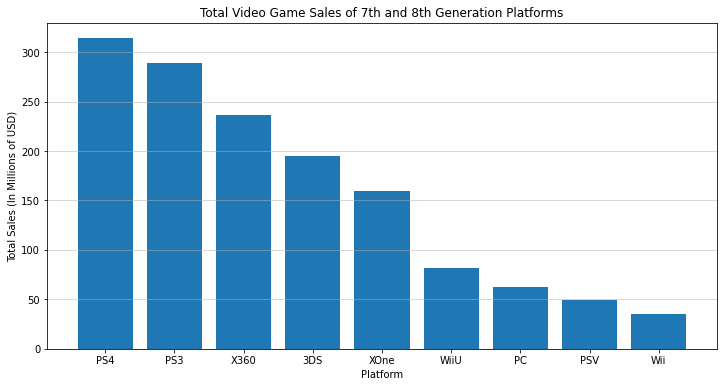

In [12]:
plt.figure(figsize = (12, 6))
plt.bar(total_sales_by_platform['platform'], total_sales_by_platform['total_sales'])
plt.grid(axis = 'y', linestyle = '-', linewidth = 0.7, alpha = 0.7) 
plt.title('Total Video Game Sales of 7th and 8th Generation Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (In Millions of USD)')
plt.show()

Interesting! Ice stakeholders should know that since 2012 Sony's home platforms have been the winners in terms of total video game sales, with the PS4 being in first place and the PS3 being in second. I especially find it interesting how the PS3, a seventh generation platform, has made pretty close to double the total video game sales of the Xbox One, which is an eighth generation platform. Conversely, Sony's handheld platform, the PSV, is not doing well, being in second to last place in total video game sales.

In contrast to Sony, Nintendo's handheld platform, the 3DS, is doing quite well in total video game sales, being in fourth place. However, also in contrast to Sony, Nintendo's previous and current home platforms, the Wii and WiiU, are really struggling to compete with its competitors.

Since I would like to display multiple bar graphs that show the yearly total video game sales for each contemporary platform, it would be a good idea to build a function that would help my code be as concise as possible. The function is written in the next line.

In [13]:
def plot_sales_by_platform(sales_data, platform_name):
    platform_sales = sales_data[sales_data['platform'] == platform_name]
    platform_sales_grouped = platform_sales.groupby('year_of_release')['total_sales'].sum().reset_index()

    plt.figure(figsize = (12, 6))
    plt.bar(platform_sales_grouped['year_of_release'], platform_sales_grouped['total_sales'])
    plt.grid(axis = 'y', linestyle = '-', linewidth = 0.7, alpha = 0.7)
    plt.title(f'Total Video Game Sales by Year of Release for the {platform_name}')
    plt.xlabel('Year of Release')
    plt.xticks(platform_sales_grouped['year_of_release'])
    plt.ylabel('Total Sales (In Millions of USD)')
    plt.show()

Nintendo, Sony, and Microsoft are the three leading platform manufacturers at the moment. Nintendo was the first of the three to make a video game platform, followed by Sony, and lastly Microsoft, hence I will display the bar graphs of yearly total video game sales in this order:

1) The home platforms of the 7th generation, in this order: the Nintendo Wii, the Sony PS3, and the Microsoft Xbox 360.

2) The handheld platforms of the 8th generation, in this order: the Nintendo 3DS and the Sony PSV.

3) The home platforms of the 8th generation, in this order: the Nintendo WiiU, the Sony PS4, and the Microsoft Xbox One.

4) The PC (Personal Computer) in its own, stand-alone category since it overlaps with both the 7th and the 8th generation platforms. 

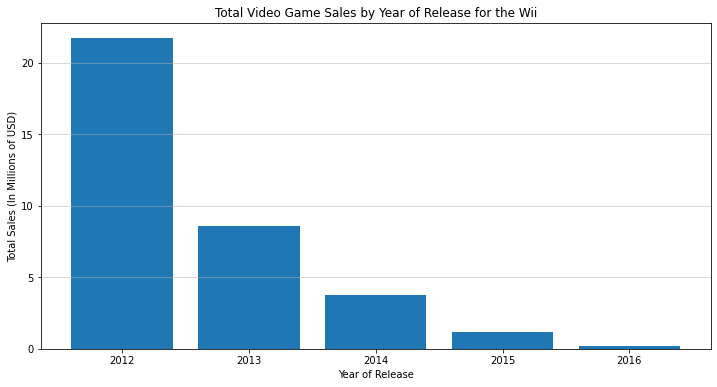

In [14]:
plot_sales_by_platform(sales_since_2012, 'Wii')

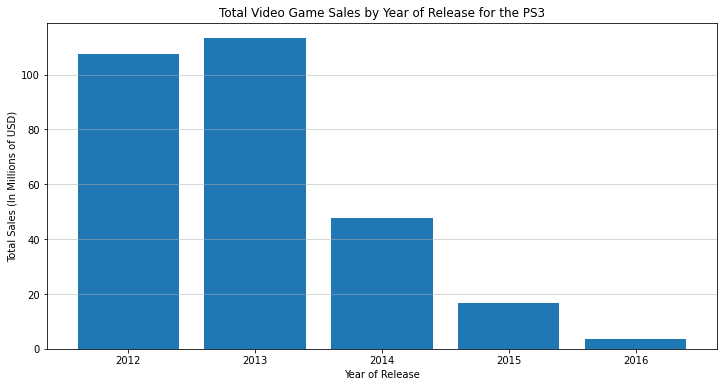

In [15]:
plot_sales_by_platform(sales_since_2012, 'PS3')

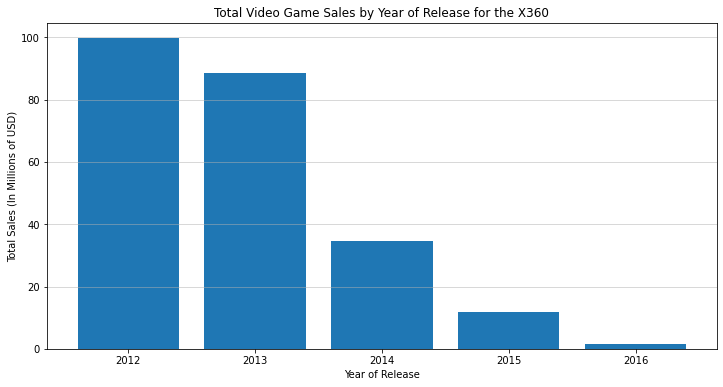

In [16]:
plot_sales_by_platform(sales_since_2012, 'X360')

It is clear that a generational shift has occurred, in which the Wii, PS3, and Xbox 360 are being phased out by their successors, the WiiU, PS4, and Xbox One. The above distributions illustrate that even the most popular platforms eventually decline in popularity to the point of having zero sales, due to the fact that their manufacturers either eventually create a successor or stop producing platforms altogether.

It is common for platform manufacturers to release a new platform every 5 to 8 years, and consequently the predecessor tends to have a total life span of 9 to 12 years. Regarding the total life span of a typical platform, sales tend to peak in the middle of the life span before rapidly declining due to demand for and availability of new platforms that have improved specifications, and hence presumably better games.

It would be incredibly useful to know which contemporary platforms are leading in sales at the moment. Furthermore, it would be good to know which contemporary platforms are growing in sales (and to what extent) and which are shrinking (and to what extent). Knowing this would help Ice identify potentially profitable platforms.

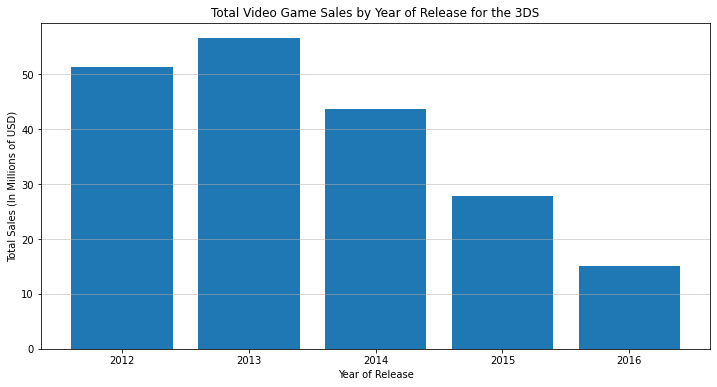

In [17]:
plot_sales_by_platform(sales_since_2012, '3DS')

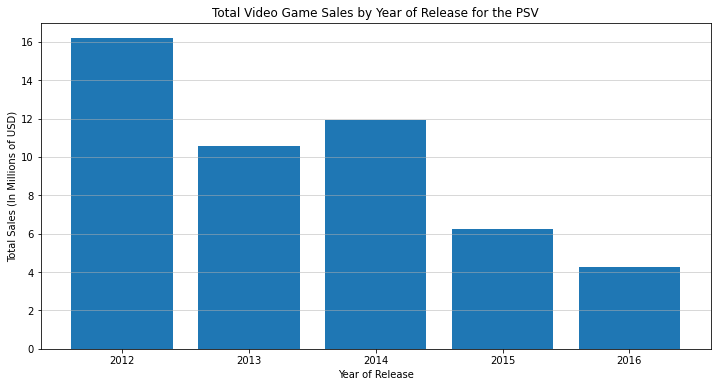

In [18]:
plot_sales_by_platform(sales_since_2012, 'PSV')

Nintendo's handheld, the 3DS, is making **FAR MORE** in video game sales than Sony's, the PlayStation Vita. In fact, every year so far the 3DS has made over three times more in total video game sales than the Vita. That said, total video game sales of the 3DS have been in decline since 2013. 

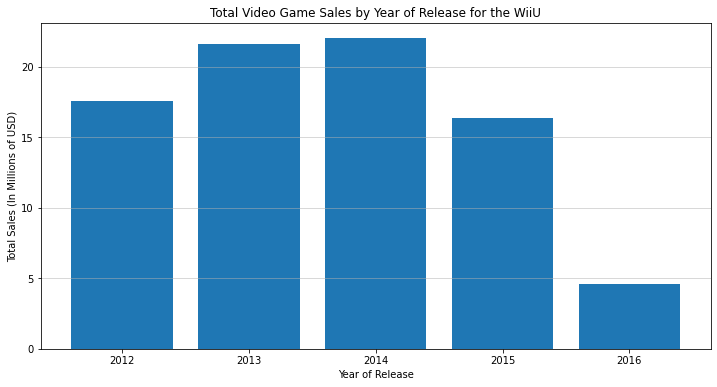

In [19]:
plot_sales_by_platform(sales_since_2012, 'WiiU')

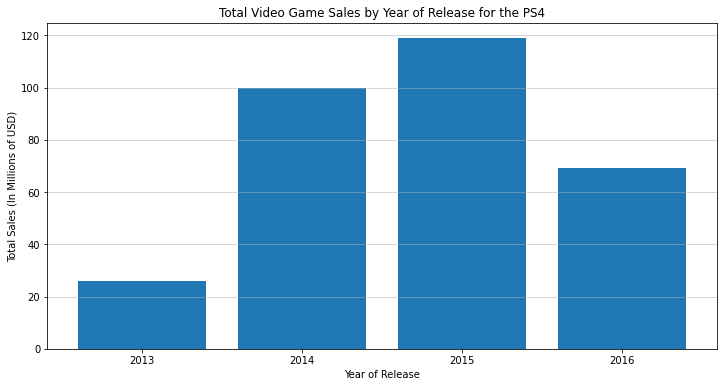

In [20]:
plot_sales_by_platform(sales_since_2012, 'PS4')

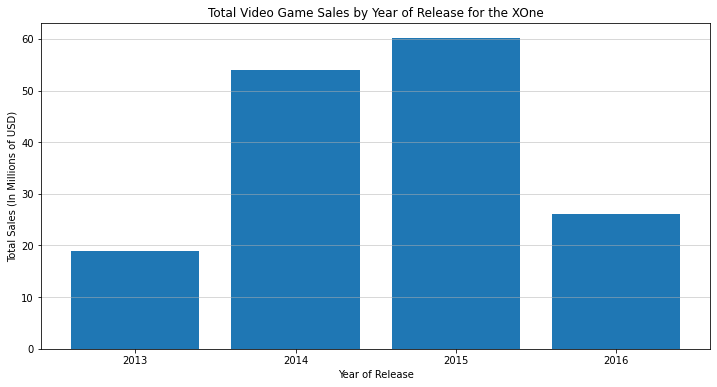

In [21]:
plot_sales_by_platform(sales_since_2012, 'XOne')

Interestingly, all five platforms of this generation have had far fewer total video game sales in 2016 compared to 2015. Perhaps this can partially be explained by the fact that Ice's sales dataset contains 360 distinct video games that were released 2015, but only 297 that were released in 2016. 

That observation aside, the PS4 is winning so far this generation **BY A LONG SHOT**. In PS4's popularity really skyrocketed in 2014, when its total video game sales was approximately 100 million USD. This is close to double how much the Xbox One made in total video game sales that year, and over four times more than how much the WiiU made. 

In 2015, total PS4 video game sales was approximately 120 million USD, whereas the Xbox One's total sales was about half that, approximately 60 million USD. The WiiU's total sales were even lower than that at a little over 15 million USD, or about 1/8 that of the PS4.

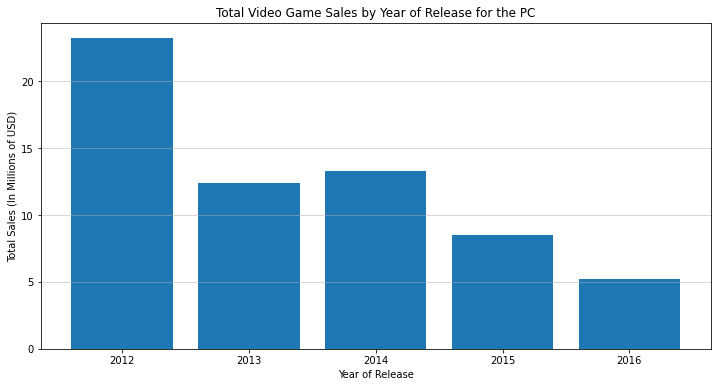

In [22]:
plot_sales_by_platform(sales_since_2012, 'PC')

I honestly don't know why total sales of PC games were so much higher in 2012 than subsequent years, but interestingly the years 2012 and 2013 are when the shift from seventh generation platforms to eighth generation occurred. Maybe PC games did, relatively, much better in 2012 because that year is when PC games began having eighth generation quality graphics and gameplay mechanics?

What I can confidently say is that Ice stakeholders should make most upcoming PC games low priorities since, clearly, the PC is unable to compete with home consoles that are in their prime.

It would be nice to have side-by-side comparisons of the global sales of all games, broken down by platforms of the same generation. 

Making box plots seems appropriate for these kinds of comparisons.

The first time around that I made the box plots, I made two crucial observations:

A) Each platform has games that are high outliers, i.e. games that have sold far more copies than what is the norm. This goes to show that if a platform wants to be successful, all it really needs is for a small number of its games to be "smash hits".

B) All of the boxes finish before reaching 2 million USD in total sales. That means at least 75% of all games on each platform made less than 2 million USD in total sales (I say "at least 75%" because the rightmost side of each "box" indicates the 75th percentile value).

I will now make four different box plots to further examine the distributions of sales, in this order (just like before):

1) The home platforms of the 7th generation, in this order: the Nintendo Wii, the Sony PS3, and the Microsoft Xbox 360.

2) The handheld platforms of the 8th generation, in this order: the Nintendo 3DS and the Sony PSV.

3) The home platforms of the 8th generation, in this order: the Nintendo WiiU, the Sony PS4, and the Microsoft Xbox One.

4) The PC (Personal Computer) in its own, stand-alone category since it overlaps with both the 7th and the 8th generation platforms. 

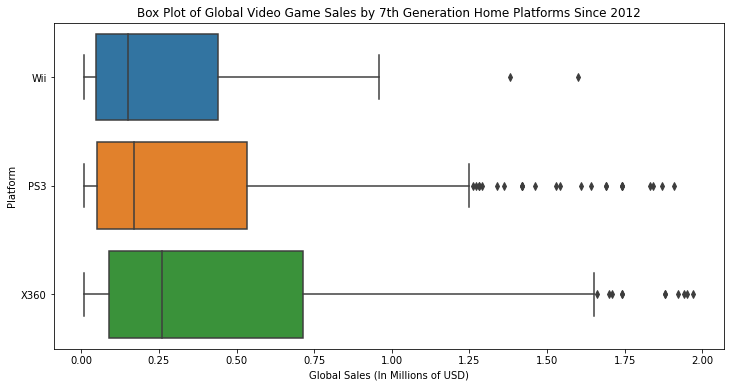

In [23]:
seventh_gen_home = sales_since_2012[(sales_since_2012['platform'].isin(['Wii', 'PS3', 'X360']))]
seventh_gen_home = seventh_gen_home[seventh_gen_home['total_sales'] <= 2]

plt.figure(figsize = (12, 6))
sns.boxplot(data = seventh_gen_home, orient = 'h', x = 'total_sales', y = 'platform', order = ['Wii', 'PS3', 'X360'])

plt.title('Box Plot of Global Video Game Sales by 7th Generation Home Platforms Since 2012')
plt.xlabel('Global Sales (In Millions of USD)')
plt.ylabel('Platform')
plt.show()

The Wii is the clear loser of the 7th generation. Its median, third quartile, and rightmost whisker value are noticeably lower than those of the PS3 and Xbox 360. The box plot makes it appear as though the Xbox 360 is the winner of this generation, since it has the largest median, third quartile, and rightmost whisker values. This might be true of the seventh generation as a whole, but recall that the filtered dataframe looks only at games released since 2012. From the box plot one can see that since 2012 the PS3 has had numerous high outliers. The presence of these high outliers explains why the PS3 has made more in total video game sales than the Xbox 360 since 2012, despite the fact that Xbox 360 games typically sell better.

For the handheld platforms box plot, instead of setting total_sales to less than or equal to 2 (in millions of USD), I will instead set it to less than or equal to 1 because, usually, handheld games make much less in sales than home platforms.

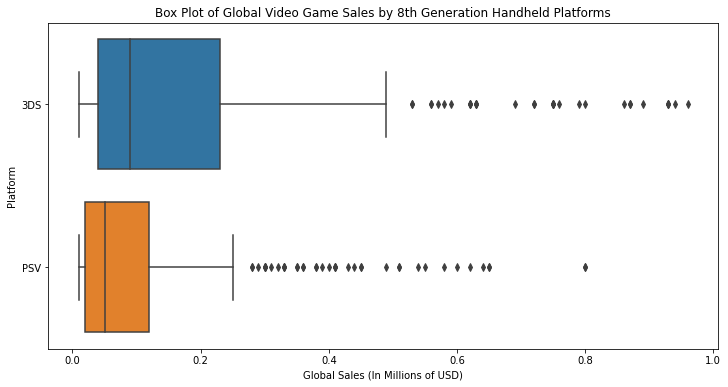

In [24]:
eighth_gen_handheld = sales_since_2012[(sales_since_2012['platform'].isin(['3DS', 'PSV']))]
eighth_gen_handheld = eighth_gen_handheld[eighth_gen_handheld['total_sales'] <= 1]

plt.figure(figsize = (12, 6))
sns.boxplot(data = eighth_gen_handheld, orient = 'h', x = 'total_sales', y = 'platform', order = ['3DS', 'PSV'])
plt.title('Box Plot of Global Video Game Sales by 8th Generation Handheld Platforms')
plt.xlabel('Global Sales (In Millions of USD)')
plt.ylabel('Platform')
plt.show()

It does not surprise me to see that 3DS games typically sell much better than PSV games, considering that we saw earlier how much more 3DS games have made in total sales since 2012 when compared to the PSV. 

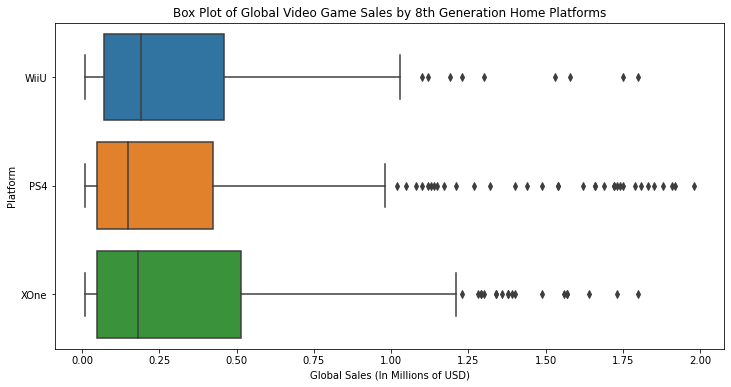

In [25]:
eighth_gen_home = sales_since_2012[(sales_since_2012['platform'].isin(['WiiU', 'PS4', 'XOne']))]
eighth_gen_home = eighth_gen_home[eighth_gen_home['total_sales'] <= 2]

plt.figure(figsize = (12, 6))
sns.boxplot(data = eighth_gen_home, orient = 'h', x = 'total_sales', y = 'platform', order = ['WiiU', 'PS4', 'XOne'])
plt.title('Box Plot of Global Video Game Sales by 8th Generation Home Platforms')
plt.xlabel('Global Sales (In Millions of USD)')
plt.ylabel('Platform')
plt.show()

I am surprised to see that the PS4 has smaller median, third quartile, and rightmost whisker values than both of its competitors, since the total sales of PS4 games is approximately double that of the Xbox One, 314.14 million USD compared to 159.32 million USD, and close to four times that of the WiiU, 82.19 million USD.

What this means is that typical PS4 games sell worse than typical Xbox One and WiiU games, but this deficit is made up for, and beyond, by how the PS4 has many more "smash hits" than the Xbox One and WiiU. In other words, the best selling PS4 games sell so much better than the best selling Xbox One and WiiU games to the point that PS4 games have the highest average global sales value of the three platforms of this generation.

Speaking of averages, I wonder if looking at the average total sales values of all the platforms in my filtered dataframe will result in any new insights. After making one last box plot for PC games, I will make bar graphs to compare average total sales values.

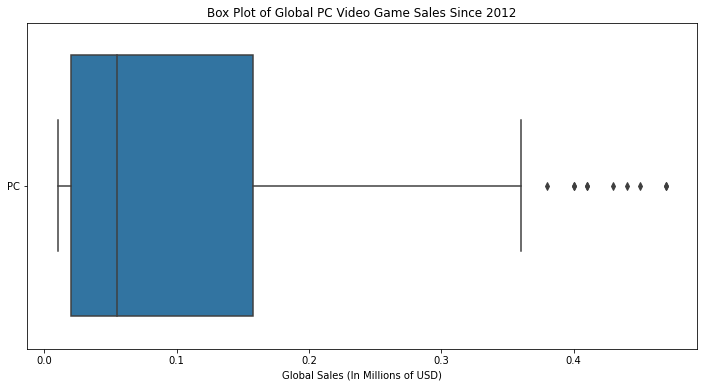

In [26]:
pc_since_2012 = sales_since_2012[(sales_since_2012['platform'] == 'PC')]
pc_since_2012 = pc_since_2012[pc_since_2012['total_sales'] <= 0.5]

plt.figure(figsize = (12, 6))
sns.boxplot(data = pc_since_2012, orient = 'h', x = 'total_sales', y = 'platform')
plt.title('Box Plot of Global PC Video Game Sales Since 2012')
plt.xlabel('Global Sales (In Millions of USD)')
plt.ylabel('')
plt.show()

Notice in my code for the PC's box plot that instead of setting total_sales to less than or equal to 2 (in millions of USD) or even 1, I set it less than or equal to 0.5. This really goes to show that even the best selling PC games really struggle to compete with their home platform counterparts.

In [27]:
avg_sales_platform = sales_since_2012.groupby('platform')['total_sales'].mean().reset_index()
avg_sales_platform = avg_sales_platform.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)
avg_sales_platform = avg_sales_platform.rename(columns = {'total_sales': 'avg_sales'})

display(avg_sales_platform)

,platform,avg_sales
0,X360,0.810068
1,PS4,0.801378
2,Wii,0.655000
3,XOne,0.645020
4,PS3,0.585781
5,WiiU,0.559116
6,3DS,0.491439
7,PC,0.250600
8,PSV,0.119659


Let's first make a bar graph of the avg_sales_platform dataframe.

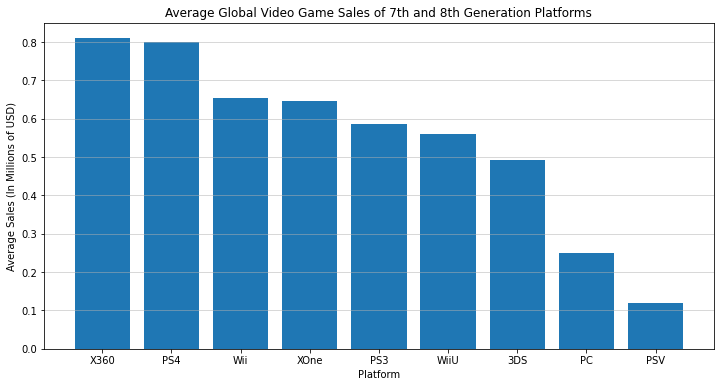

In [28]:
plt.figure(figsize = (12, 6))

plt.bar(avg_sales_platform['platform'], avg_sales_platform['avg_sales'])
plt.grid(axis = 'y', linestyle = '-', linewidth = 0.7, alpha = 0.7)
plt.title('Average Global Video Game Sales of 7th and 8th Generation Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Sales (In Millions of USD)')
plt.show()

The above graph visualizes how, despite the fact that PS4 games have a lower median global sales value than Xbox One and WiiU games, the presence of extreme outliers in the PS4's library cause it to have the highest average global video game sales value of all the platforms in the eighth generation. Intriguingly, the Xbox 360 has a slightly higher average. Furthermore, in contrast to its eighth generation counterpart, the PS3 actually has the lowest average sales value of the seventh generation home platforms.

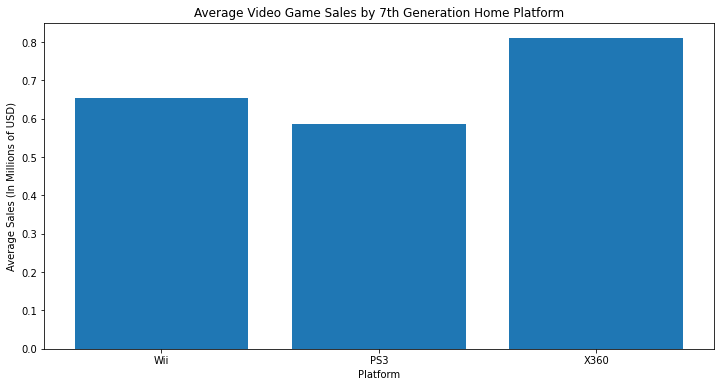

In [29]:
home_7th_avg = avg_sales_platform[avg_sales_platform['platform'].isin(['Wii', 'PS3', 'X360'])].copy()

order_7th_home = ['Wii', 'PS3', 'X360']
home_7th_avg['platform'] = pd.Categorical(home_7th_avg['platform'], categories = order_7th_home, ordered = True)
home_7th_avg = home_7th_avg.sort_values('platform')

plt.figure(figsize = (12, 6))
plt.bar(home_7th_avg['platform'], home_7th_avg['avg_sales'])
plt.xlabel('Platform')
plt.ylabel('Average Sales (In Millions of USD)')
plt.title('Average Video Game Sales by 7th Generation Home Platform')
plt.show()

The Xbox 360 having the highest average video game sales value coincides nicely with the box plot made above.

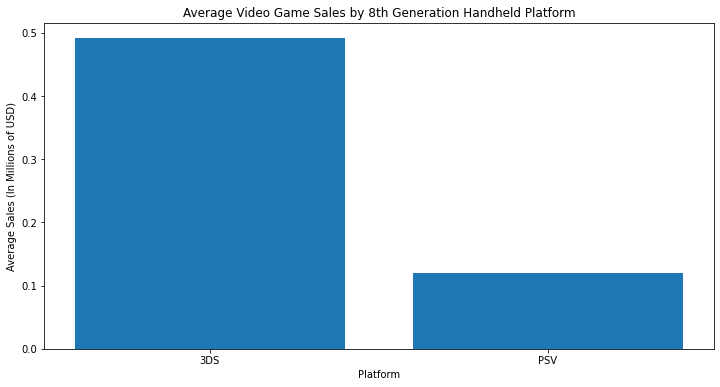

In [30]:
handheld_8th_avg = avg_sales_platform[avg_sales_platform['platform'].isin(['3DS', 'PSV'])].copy()

order_8th_handheld = ['3DS', 'PSV']
handheld_8th_avg['platform'] = pd.Categorical(handheld_8th_avg['platform'], 
                                              categories = order_8th_handheld, ordered = True)
handheld_8th_avg = handheld_8th_avg.sort_values('platform')

plt.figure(figsize = (12, 6))
plt.bar(handheld_8th_avg['platform'], handheld_8th_avg['avg_sales'])
plt.xlabel('Platform')
plt.ylabel('Average Sales (In Millions of USD)')
plt.title('Average Video Game Sales by 8th Generation Handheld Platform')
plt.show()

What a discrepancy! On average, 3DS games make nearly five times more in sales than PSV games!

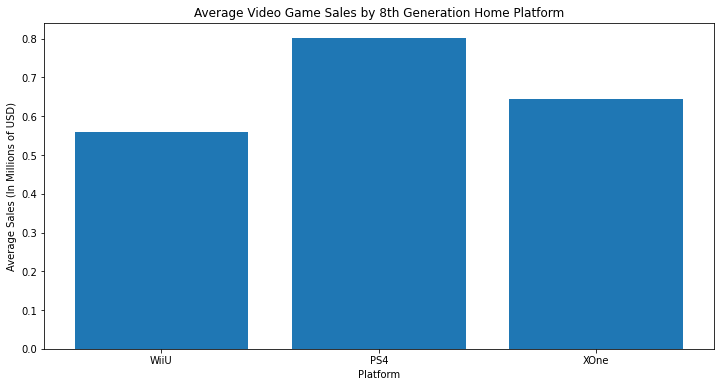

In [31]:
home_8th_avg = avg_sales_platform[avg_sales_platform['platform'].isin(['WiiU', 'PS4', 'XOne'])].copy()

order_8th_home = ['WiiU', 'PS4', 'XOne']
home_8th_avg['platform'] = pd.Categorical(home_8th_avg['platform'], categories = order_8th_home, ordered = True)
home_8th_avg = home_8th_avg.sort_values('platform')

plt.figure(figsize = (12, 6))
plt.bar(home_8th_avg['platform'], home_8th_avg['avg_sales'])
plt.xlabel('Platform')
plt.ylabel('Average Sales (In Millions of USD)')
plt.title('Average Video Game Sales by 8th Generation Home Platform')
plt.show()

It would be interesting to investigate why Sony's platform of the current generation, on average, has the best selling games considering that last generation Sony's platform had, on average, the worst selling games. 

I am curious to investigate to what extent, if any, user and professional reviews affect sales. 

To investigate this, I will use the PS4's data because its games, as a whole, have been the best selling of all the platforms of this generation, and hence it has arguably the best data to use for this investigation. The code below builds two scatter plots that use user_score and critic_score, respectively, as the explanatory variable and total_sales as the response variable.

In [32]:
ps4_data = sales_since_2012[sales_since_2012['platform'] == 'PS4']

ps4_user_reviews = ps4_data[~ps4_data['user_score'].isna()]

ps4_critic_reviews = ps4_data[~ps4_data['critic_score'].isna()]

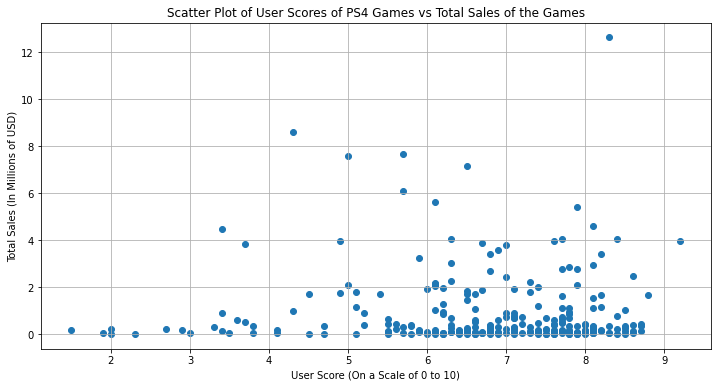

Correlation Coefficient: -0.031957110204556424


In [33]:
plt.figure(figsize = (12, 6))
plt.scatter(ps4_user_reviews['user_score'], ps4_user_reviews['total_sales'])
plt.title('Scatter Plot of User Scores of PS4 Games vs Total Sales of the Games')
plt.xlabel('User Score (On a Scale of 0 to 10)')
plt.ylabel('Total Sales (In Millions of USD)')
plt.grid(True)
plt.show()

user_score_vs_total_sales_ps4 = ps4_user_reviews['user_score'].corr(ps4_user_reviews['total_sales'])
print('Correlation Coefficient:', user_score_vs_total_sales_ps4)

Really? Wow! The correlation between user_score and total_sales is virtually zero. This leads me to the conclusion that while having a high user_score value certainly would not harm a game's sales, having a high user_score value is extremely unlikely to be a person's top reason for wanting to buy a particular game.

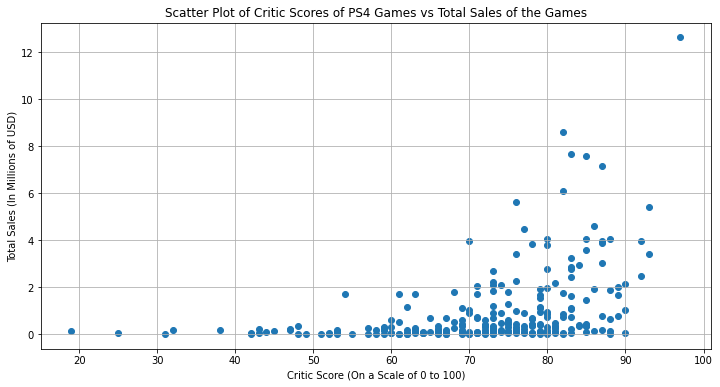

Correlation Coefficient: -0.03362497596528878


In [34]:
plt.figure(figsize = (12, 6))
plt.scatter(ps4_critic_reviews['critic_score'], ps4_critic_reviews['total_sales'])
plt.title('Scatter Plot of Critic Scores of PS4 Games vs Total Sales of the Games')
plt.xlabel('Critic Score (On a Scale of 0 to 100)')
plt.ylabel('Total Sales (In Millions of USD)')
plt.grid(True)
plt.show()

critic_score_vs_total_sales_ps4 = ps4_critic_reviews['user_score'].corr(ps4_critic_reviews['total_sales'])
print('Correlation Coefficient:', critic_score_vs_total_sales_ps4)

Once again, virtually no correlation between critic_score and total_sales values. I similarly conclude that having a high critic_score value is very unlikely to be a person's top reason for wanting to buy a particular game.

I did notice, however, that most of the outliers in this scatter plot have critic score values of at least 80. I wonder if this suggests that the best selling games tend to have excellent reviews from critics, but the converse of that statement, having excellent reviews from critics tends to result a game being a best seller, is false. More research would need to be done.

Though platform-exclusive games exist (for example, "Metal Gear Solid 4: Guns of the Patriots" only ever released on the PS3), it is more common for games to be released on multiple platforms (for example, "Metal Gear Sold V: The Phantom Pain" was released on the PS3, the Xbox 360, the PS4, the Xbox One, and the PC). I mention this because I would like to investigate if games that are released on multiple platforms tend to sell, more or less, equally well on each platform, or if any one platform tends to get substantially more sales.

For this investigation, I will only compare platforms from the same generation. Though some games get released on both current generation and previous generation platforms (for example, "Middle-earth: Shadow of Mordor" was released on both the PS3 and the PS4, as well as both the Xbox 360 and the Xbox One), I don't think it is a good idea to compare sales between current and previous generation platforms because the previous generation platform versions are likely to fare significantly worse in sales due to, among other reasons, worse graphics, inferior gameplay mechanics, and the perception of gamers that the previous generation platforms are past their prime.

Furthermore, I will only compare home platforms, not handhelds, because the 3DS and PSV have very few games in common, to the point they are not useful for this investigation.

In [36]:
seventh_gen = sales_since_2012[sales_since_2012['platform'].isin(['Wii', 'PS3', 'X360'])]

filter_seventh_gen = seventh_gen.groupby('name').filter(lambda x: len(x) == 3)['name'].unique() 

multi_platform_games_seventh_gen = seventh_gen[seventh_gen['name'].isin(filter_seventh_gen)]

multi_platform_games_seventh_gen = multi_platform_games_seventh_gen.sort_values(by = ['name', 'platform'], 
                                                                                ascending = True)

In [37]:
display(multi_platform_games_seventh_gen.groupby('platform')['total_sales'].describe().reset_index())

,platform,count,mean,std,min,25%,50%,75%,max
0,PS3,27.0,1.259259,1.980363,0.01,0.195,0.47,1.120,8.17
1,Wii,27.0,1.008889,1.459163,0.01,0.150,0.42,1.165,6.76
2,X360,27.0,1.134074,1.296683,0.01,0.295,0.73,1.310,5.16


Considering the plots made earlier in this project, I am not surprised to see that the Xbox 360 has noticeably larger first, second, and third quartile values than the PS3 and Wii, yet the PS3 has the largest mean value. This coincides nicely with the observations made earlier that typical Xbox 360 games sell better than typical PS3 games, yet the best selling PS3 games sell better than the best selling Xbox 360 games. 

I am also not surprised that, on average, the Wii version of games make the least in sales because of the three platforms, the Wii has by far the weakest graphics and other specifications, which discourages many gamers from choosing the Wii version over the Xbox 360 and/or PS3 version. 

In [38]:
eighth_gen = sales_since_2012[sales_since_2012['platform'].isin(['WiiU', 'PS4', 'XOne'])]

filter_eighth_gen = eighth_gen.groupby('name').filter(lambda x: len(x) == 3)['name'].unique() 

multi_platform_games_eighth_gen = eighth_gen[eighth_gen['name'].isin(filter_eighth_gen)]

multi_platform_games_eighth_gen = multi_platform_games_eighth_gen.sort_values(by = ['name', 'platform'], ascending = True)

In [39]:
display(multi_platform_games_eighth_gen.groupby('platform')['total_sales'].describe().reset_index())

,platform,count,mean,std,min,25%,50%,75%,max
0,PS4,32.0,0.910312,1.165907,0.03,0.2275,0.580,0.8700,4.32
1,WiiU,32.0,0.385000,0.269731,0.03,0.1450,0.405,0.6025,1.01
2,XOne,32.0,0.568437,0.750342,0.01,0.1550,0.340,0.5300,2.92


Apparently, the PS4 version of games typically exceed the Xbox One and WiiU versions in sales by a significant margin. The 25th percentile, median, 75th percentile, and mean sales values of the PS4 verions are all much larger than those of the Xbox One and the WiiU. 

There is also quite a big gap between mean Xbox One version sales and mean WiiU version sales. Similar to what happened to the original Wii, the WiiU's graphics and other specifications are much weaker than those of the PS4 and Xbox One, which once again discourages many gamers from choosing the WiiU version of a game over the others.

Now that I have looked at the general distribution of video game sales by platform, I wonder what insights I can acquire by looking at the general distribution of sales by genre. I would expect that some genres make significantly more in sales (and others significantly less) than others.

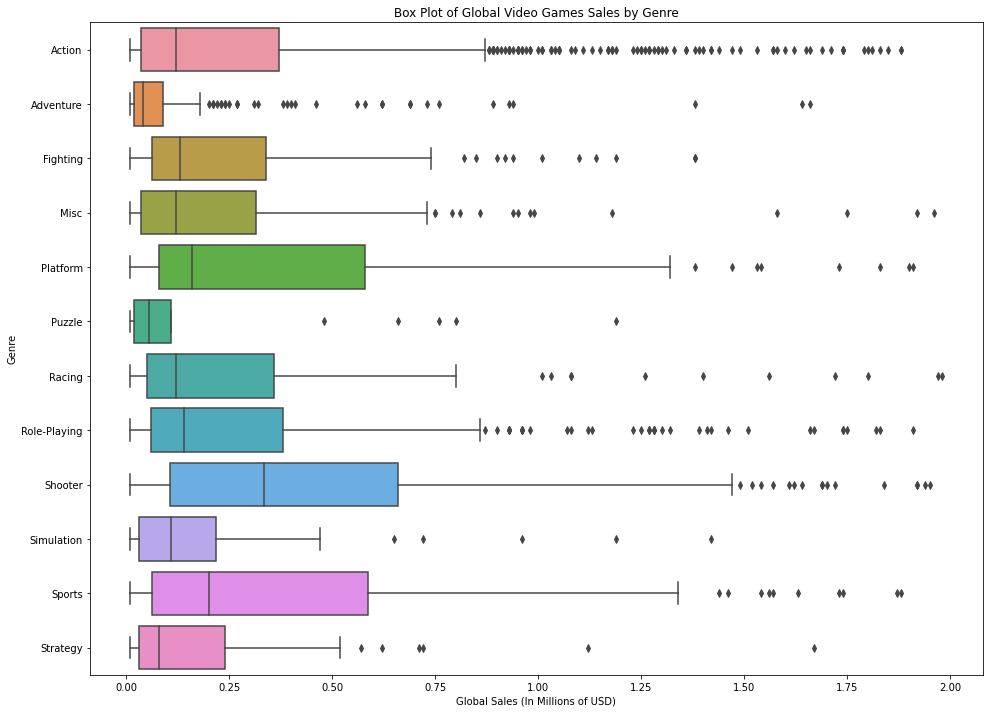

In [40]:
by_genre = sales_since_2012[sales_since_2012['total_sales'] <= 2]
alphabetical_order = sorted(by_genre['genre'].unique())

plt.figure(figsize = (16, 12))
sns.boxplot(data = by_genre, orient = 'h', x = 'total_sales', y = 'genre', order = alphabetical_order)
plt.title('Box Plot of Global Video Games Sales by Genre')
plt.xlabel('Global Sales (In Millions of USD)')
plt.ylabel('Genre')
plt.show()

The Shooter genre has the largest median global sales value, which means if a person randomly chose one "typical" game from each genre that was released on or after 2012, the Shooter game is likely to be the one with the most sales. Furthermore, I noticed that the Shooter genre's box's right-side whisker stretches out the furthest of all the genres. This implies that the best selling Shooter games sell more than the best selling games of any other genre. The genre with the second largest median is Sports, which is also the genre whose right-ride whisker stretches out the second furthest.

On the flip side, the two worst performing genres, by far, are Puzzle and Adventure. Those two genres have the smallest median values, the smallest third quartile values, and the smallest maximum whisker values. This suggests that even the best selling games in these genres can't compete with the top games of other genres. I would even go so far as to say that the best selling Puzzle and Adventure games struggle to compete with even the "typical" games of other genres.

Now I wonder what insights, if any, I can find by looking the average sales of each genre.

In [41]:
avg_sales_genre = sales_since_2012.groupby('genre')['total_sales'].mean().reset_index()
avg_sales_genre = avg_sales_genre.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)
avg_sales_genre = avg_sales_genre.rename(columns = {'total_sales': 'avg_sales'})

display(avg_sales_genre)

,genre,avg_sales
0,Shooter,1.296723
1,Platform,0.726627
2,Sports,0.701367
3,Role-Playing,0.533658
4,Misc,0.467500
5,Racing,0.465217
6,Action,0.457020
7,Simulation,0.446795
8,Fighting,0.420286
9,Puzzle,0.199583


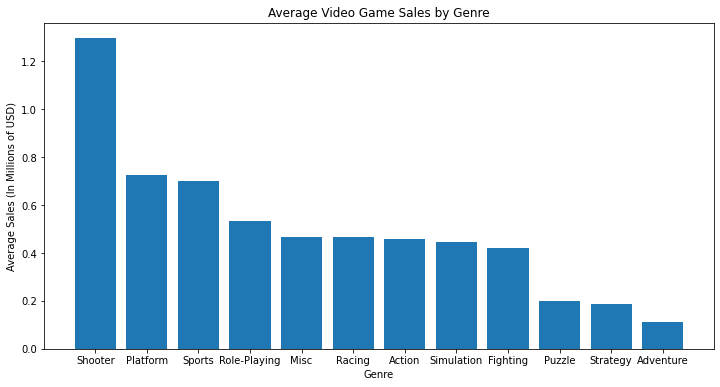

In [42]:
plt.figure(figsize = (12, 6))
plt.bar(avg_sales_genre['genre'], avg_sales_genre['avg_sales'])
plt.xlabel('Genre')
plt.ylabel('Average Sales (In Millions of USD)')
plt.title('Average Video Game Sales by Genre')
plt.show()

As implied by the above bar graph, not only do "typical" Shooter games tend to do quite well in sales, the Shooter genre has such high outliers to the point that it, by a noticeably large margin, is on average the best selling genre. In distant second place is the Platform genre, which is followed closely by the Sports genre in third place. Fourth place is awarded to Role-Playing, and fifth place goes to Misc (miscellaneous).

I am not surprised to see that Adventure is dead last, but interestingly the second worst genre, on average, is Strategy and not Puzzle, which is third worst. The four genres in the middle (Misc, Racing, Action, and Simulation) all sell nearly equally well, on average.

# Section 4: Creating a user profile for NA, EU, & JP

I would like to know what the top five platforms in each of North America, Europe, and Japan are.

In [43]:
na_top_platforms = sales_since_2012.groupby('platform')['na_sales'].sum().reset_index()
na_top_platforms = na_top_platforms.sort_values(by = 'na_sales', ascending = False).reset_index(drop = True)

display(na_top_platforms)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98


In [44]:
eu_top_platforms = sales_since_2012.groupby('platform')['eu_sales'].sum().reset_index()
eu_top_platforms = eu_top_platforms.sort_values(by = 'eu_sales', ascending = False).reset_index(drop = True)

display(eu_top_platforms)

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36


In [45]:
jp_top_platforms = sales_since_2012.groupby('platform')['jp_sales'].sum().reset_index()
jp_top_platforms = jp_top_platforms.sort_values(by = 'jp_sales', ascending = False).reset_index(drop = True)

display(jp_top_platforms)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,Wii,3.39
6,X360,1.57
7,XOne,0.34
8,PC,0.00


In North America, the top five selling platforms, in descending order, are the X360, the PS4, the PS3, the XOne, and the 3DS.

In contrast, in Europe, the top five, in descending order, are the PS4, the PS3, the X360, the XOne, and the 3DS

Notice that North America and Europe have the same platforms in the top three, albeit in different spots, and that they have the same platforms in fourth and fifth place. This suggests that video game sales are very similar in both regions.

The top five platforms list is very different in Japan. There, the top five, in descending order, are the 3DS, the PS3, the PSV, the PS4, and the WiiU. 

I personally find it counterintuitive that the DS, a handheld platform, is the best selling platform in Japan, since home platforms make more in video games sales than handhelds, on average. Even more surprisingly, the PSV takes third place in Japan, ahead of the PS4. I am so surprised by this result in particular because the PSV actually has the worst video game sales of all platforms in North America and Europe.

I wonder why Xbox 360 and Xbox One games sell so poorly in Japan, considering that both platforms appear in the top five lists for North America and Europe. Conversely, the Xbox 360 is in seventh place in Japan, in other words third to last place, and the Xbox One is in eighth place, i.e. second last. 

Lastly, I wonder why PC games have virtually zero sales in Japan. Though PC games have never been able to compete with home platforms that are in their prime, seeing the jp_sales value being 0.00 for the PC is, in my view, shocking. Maybe PC games sell so poorly in Japan because handheld platforms are so popular, which suggests to me that Japanese gamers, for some reason, prefer to have their games be available "on the go".

It would be good to know what the top five genres in each region are. I am curious to know whether or not there are any key differences in the top genres between regions.

In [46]:
na_top_genres = sales_since_2012.groupby('genre')['na_sales'].sum().reset_index()
na_top_genres = na_top_genres.sort_values(by = 'na_sales', ascending = False).reset_index(drop = True)

display(na_top_genres)

,genre,na_sales
0,Action,177.00
1,Shooter,144.77
2,Sports,81.38
3,Role-Playing,60.65
4,Misc,38.13
5,Platform,25.17
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.86


In [47]:
eu_top_genres = sales_since_2012.groupby('genre')['eu_sales'].sum().reset_index()
eu_top_genres = eu_top_genres.sort_values(by = 'eu_sales', ascending = False).reset_index(drop = True)

display(eu_top_genres)

,genre,eu_sales
0,Action,158.43
1,Shooter,113.47
2,Sports,68.84
3,Role-Playing,46.76
4,Racing,27.29
5,Misc,25.95
6,Platform,20.98
7,Simulation,14.47
8,Fighting,10.79
9,Adventure,9.41


In [48]:
jp_top_genres = sales_since_2012.groupby('genre')['jp_sales'].sum().reset_index()
jp_top_genres = jp_top_genres.sort_values(by = 'jp_sales', ascending = False).reset_index(drop = True)

display(jp_top_genres)

,genre,jp_sales
0,Role-Playing,59.12
1,Action,49.18
2,Misc,12.45
3,Simulation,10.35
4,Shooter,9.23
5,Fighting,9.08
6,Platform,8.63
7,Sports,6.98
8,Adventure,6.56
9,Racing,2.50


In North America, the top five selling genres, in descending order, are Action, Shooter, Sports, Role-Playing, and Misc.

As for Europe, the top five, in descending order, are Action, Shooter, Sports, Role-Playing, and Racing.

Once again, North America and Europe have similar profiles. The only difference is the genre in fifth place; Racing takes fifth place in Europe, followed closely by Misc in sixth place, whereas, oddly enough, Racing is in merely eighth place in North America, where Misc takes the fifth place spot. Also, Action games very clearly takes first place in both regions, followed distantly by Shooter games, followed distantly by Sports games.

Just like with platforms, Japan's top five genres list is quite different from that of North America and Europe. Their top five are Role-Playing, Action, Misc, Simulation, and Shooter.

What stands out to me the most is how Japan is the only region where the Simulation genre made the top five list, a genre that is in merely eighth place in Europe and in merely tenth place in North America. Also noteworthy is how much better Role-Playing games do in Japan, and how much worse Shooter games do, compared to North America and Europe. 

This investigation goes to show that Ice can expect most games to sell about equally well in North America as they do in Europe, but cannot use those sales figures to accurately predict how the games sell in Japan, and vice-versa.

I wonder to what extent, if any, ESRB ratings affect video game sales. 

To help me investigate this, I will filter the sales_since_2012 dataframe in the following ways:

(1) Only use North American sales data because only North America uses ESRB.

(2) Drop all rows with a null ESRB rating because those rows won't help with this investigation.

(3) Drop all rows with an ESRB rating of AO, EC, K-A, or RP because these ratings are so rare to the point they are not useful for this investigation.

(4) Just like what I did above, I will make a box plot of the summary statistics as well as a bar graph of the average sales by ESRB rating.

In [49]:
esrb_sales_data = sales_since_2012[~sales_since_2012['rating'].isnull()]
esrb_sales_data = esrb_sales_data[~esrb_sales_data['rating'].isin(['AO', 'EC', 'K-A', 'RP'])]

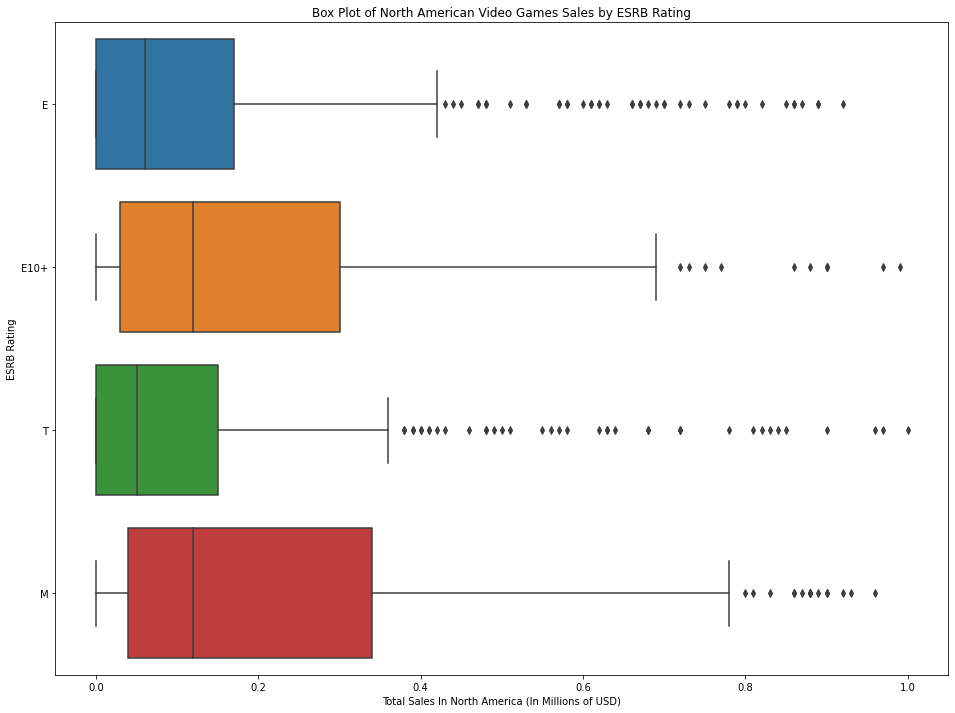

In [50]:
rating_box_plot = esrb_sales_data[esrb_sales_data['na_sales'] <= 1]

plt.figure(figsize = (16, 12))
sns.boxplot(data = rating_box_plot, orient = 'h', x = 'na_sales', y = 'rating', order = ['E', 'E10+', 'T', 'M'])
plt.title('Box Plot of North American Video Games Sales by ESRB Rating')
plt.xlabel('Total Sales In North America (In Millions of USD)')
plt.ylabel('ESRB Rating')
plt.show()

Interestingly, rated E10+ and M games have very similar total sales distributions. Though their median values are very similar, rated M has noticeably larger third quartile and rightmost whisker total sales values, which implies that the top 25% best selling rated M games tend to sell better than the top 25% best selling E10+ games. 

Furthermore, rated E and T games have very similar distributions. Rated E has slightly larger median, third quartile, and rightmost whisker values, which implies that rated E games as a whole sell better than rated T games.

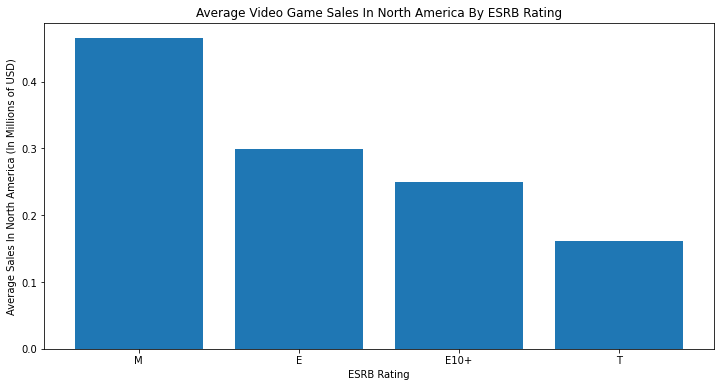

In [51]:
rating_bar_graph = esrb_sales_data.groupby('rating')['na_sales'].mean().reset_index()
rating_bar_graph = rating_bar_graph.sort_values(by = 'na_sales', ascending = False)
rating_bar_graph = rating_bar_graph.reset_index(drop = True)

plt.figure(figsize = (12, 6))
plt.bar(rating_bar_graph['rating'], rating_bar_graph['na_sales'])
plt.xlabel('ESRB Rating')
plt.ylabel('Average Sales In North America (In Millions of USD)')
plt.title('Average Video Game Sales In North America By ESRB Rating')
plt.show()

As expected, on average rated M games make more in sales than games of any other rating. In relatively distant second place is games with an E rating, followed by rated E10+, followed (only slightly) by rated T. What I did not expect is that rated E games, on average, sell better than E10+ because the above box plot made me expect the opposite. This has to mean that the rated E library of games have such high outliers to the point that rated E games sell better on average despite rated E10+ games having a larger median total sales value. 

Since E stands for "Everyone", E10+ stands for "Everyone 10 and Up" and T stands for "Teen" (i.e. ages 13+), it is somewhat ironic that rated M games, M standing for "Mature" (i.e. ages 17+), sell the best, on average, because M is the most age-restricted rating of the four. That said, there are numerous video game franchises that are highly popular where most if not all of the games are rated M (examples include *Call of Duty*, *Far Cry*, *Grand Theft Auto*, *Mortal Kombat*, and *Resident Evil*).

# Section 5: Hypothesis Testing

I am interested in testing the following hypothesis:

***Average user ratings of the Xbox One and PC platforms are the same.***

This hypothesis calls for using a two-tailed test, since it is possible that average user ratings of Xbox One games are higher than their PC version counterparts, but it is also possible that the Xbox One games have lower average user ratings.

The null and alternative hypotheses are the following:

**Null:** Average user ratings of the Xbox One and PC platforms are equal.

**Alternative:** Average user ratings of the Xbox One and PC platforms are not equal (i.e. one platform has higher average user ratings than the other).

This test uses a significance level of 95% because this is the most commonly used level and I see no good reason to use a different one.

Since this test is only interested in Xbox One and PC games, I will filter the sales_since_2012 dataframe accordingly. Furthermore, null user_score values are useless to this test, so I will drop those rows. Finally, to make the comparison apples to apples, only games that were released on **both** the Xbox One and the PC should be looked at.

In [52]:
xone_vs_pc = sales_since_2012[(sales_since_2012['platform'].isin(['XOne', 'PC'])) 
                              & (~sales_since_2012['user_score'].isna())]

games_on_xone_and_pc = xone_vs_pc.groupby('name').filter(
    lambda group: all(platform in group['platform'].values for platform in ['XOne', 'PC']))['name'].unique()

xone_vs_pc = xone_vs_pc[xone_vs_pc['name'].isin(games_on_xone_and_pc)]

Before I conduct the test, I have to decide whether or not the variance in the user_scores for the XBox One version of the games should be considered equal to the variance in the user_scores for the PC version, or not. The code below prints each variance value, as well as other summary statistics for each platform.

In [53]:
xone_only = xone_vs_pc[xone_vs_pc['platform'] == 'XOne']
print('XOne user_score summary statistics:')
print(xone_only['user_score'].describe())
print()
print('XOne user_score variance:', xone_only['user_score'].var())
print()

pc_only = xone_vs_pc[xone_vs_pc['platform'] == 'PC']
print('PC user_score summary statistics:')
print(pc_only['user_score'].describe())
print()
print('PC user_score variance:', pc_only['user_score'].var())

XOne user_score summary statistics:
count    79.000000
mean      6.706329
std       1.243170
min       3.100000
25%       5.850000
50%       6.900000
75%       7.750000
max       9.200000
Name: user_score, dtype: float64

XOne user_score variance: 1.5454722492697175

PC user_score summary statistics:
count    79.000000
mean      6.136709
std       1.717719
min       1.400000
25%       4.750000
50%       6.300000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

PC user_score variance: 2.9505582603050957


Notice that the Xbox One user_score values have a variance of approximately 1.55, whereas that of the PC is approximately 2.95. 

Consequently, I will set the equal_var parameter equal to "False".

In [54]:
xone_vs_pc_test = st.ttest_ind(xone_only['user_score'], pc_only['user_score'], equal_var = False)

print('p-value:', xone_vs_pc_test.pvalue)

xone_vs_pc_test_p_value = 0.05

if xone_vs_pc_test.pvalue < xone_vs_pc_test_p_value:    
    print('We reject the null hypothesis that average user ratings of the Xbox One and PC platforms are equal.')
else:
    print('We fail to reject the null hypothesis.')

p-value: 0.018267845410565663
We reject the null hypothesis that average user ratings of the Xbox One and PC platforms are equal.


**Additional Commentary:** The mean Xbox One user_score value is approximately 6.71 with a standard deviation of approximately 1.24, whereas the mean PC user_score value is approximately 6.14 with a standard deviation of approximately 1.72. Thanks in part to the above hypothesis testing, it is reasonable to expect that when video games are released on both the Xbox One and the PC, the Xbox One versions will, on average, be somewhat better received by users and have somewhat less variation in user ratings.

I am also interested in testing the following hypothesis:

***Average user ratings for the Action and Sports genres are different.***

This hypothesis also calls for using a two-tailed test since either of the two genres, Action or Sports, are possibly the one with higher average user ratings than the other. When it comes to this kind of testing, the null hypothesis is always the one that supposes the means are equal, so I define the null and alternative hypotheses in the following way:

**Null:** Average user ratings of the Action and Sports genres are equal.

**Alternative:** Average user ratings of the Action and Sports genres are not equal (i.e. one genre has higher average user ratings than the other).

This test uses a significance level of 95% because I see no good reason to use a significance level that is different from the most commonly used one.

In the code below I filter the sales_since_2012 dataframe so that only Action and Sports games with non-null user_score values remain.

In [55]:
action_and_sports_data = sales_since_2012[sales_since_2012['genre'].isin(['Action', 'Sports'])]
action_and_sports_data = action_and_sports_data[~action_and_sports_data['user_score'].isna()]

Just like with the first hypothesis test, I am deliberately displaying the summary statistics and variance values of each genre below to give me an idea of whether or not the variance values should be treated as equal.

In [56]:
action_only = action_and_sports_data[action_and_sports_data['genre'] == 'Action']
print('Action games user_score summary statistics:')
print(action_only['user_score'].describe())
print()
print('Action games user_score variance:', action_only['user_score'].var())
print()

sports_only = action_and_sports_data[action_and_sports_data['genre'] == 'Sports']
print('Sports games user_score summary statistics:')
print(sports_only['user_score'].describe())
print()
print('Sports games user_score variance:', sports_only['user_score'].var())

Action games user_score summary statistics:
count    520.000000
mean       6.833654
std        1.365302
min        1.600000
25%        6.300000
50%        7.150000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Action games user_score variance: 1.864048280717356

Sports games user_score summary statistics:
count    194.000000
mean       5.466495
std        1.736819
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Sports games user_score variance: 3.0165399818385765


The variance values are approximately 1.86 and 3.02 for Action and Sports, respectively. I will set equal_var equal to "False".

In [57]:
action_vs_sports_test = st.ttest_ind(action_only['user_score'], sports_only['user_score'], equal_var = False)

print('p-value:', action_vs_sports_test.pvalue)

action_vs_sports_test_p_value = 0.05

if action_vs_sports_test.pvalue < action_vs_sports_test_p_value:    
    print('We reject the null hypothesis that average user ratings of Action and Sports video games are equal.')
else:
    print('We fail to reject the null hypothesis.')

p-value: 5.1613574354387965e-20
We reject the null hypothesis that average user ratings of Action and Sports video games are equal.


**Additional Commentary:** The mean user_score value for Action games is approximately 6.83 with a standard deviation of approximately 1.37, whereas the mean user_score value for Sports games is approximately 5.47 with a standard deviation of approximately 1.74. Thanks to the above hypothesis testing, it is reasonable to conclude that on average video games in the Action genre are noticeably better received by users than video games in the Sports genre. Furthermore, Action video games tend to have slightly less variation in user ratings than Sports games.

# Section 6: Conclusions

The purpose of this project was to help stakeholders of the online, worldwide video game store **Ice** identify patterns in their sales dataset. Using these patterns, they can anticipate which games that will be released in 2017 are likely to be successful. The patterns that deserve mention are the following:

1) The PS4 is by far the best selling home platform of the current generation, in terms of total, worldwide video game sales, with the Xbox One being a distant second and the WiiU being an even more distant third. So far this generation, whenever a video game has been released on all three platforms, the PS4 version, on average, makes the most in sales by a wide margin. Hence, Ice stakeholders should especially keep an eye out for highly anticipated 2017 PS4 games, particularly if the game will be the next addition to a well-established franchise, such *Call of Duty*, *Far Cry*, *Grand Theft Auto*, *Mortal Kombat*, and *Resident Evil*. Even if said upcoming 2017 game will be exclusive to the PS4, even then it has a good chance of being a hit.

2) Though Sony's current home platform is thriving, the same cannot be said of its current handheld platform, the PlayStation Vita (PSV). Every year since 2012, the Nintendo 3DS has made three times more in total video game sales then the PSV. Hence, it is reasonable to expect 3DS games, as a whole, to continue making more money than PSV games throughout 2017. That said, since 2013 yearly total sales of 3DS video games have been sharply declining, which leads me to think that not even the 3DS should be getting very much attention from Ice stakeholders. 

3) Surprisingly, reviews of a video game from professional critics have no correlation with the game's global sales. There is also no correlation between reviews from everyday users and global sales. I acquired these observations using the sales data of the PS4, which has the highest total video games sales of its generation, and hence arguably the richest dataset to work with. Hence, Ice should not use critic nor user reviews as predictors of how well a game will do. Rather, the genre of a game is much more likely to have predictive power over how well (or poorly) it sells.

4) When looking at average video game sales by genre, Shooter games sell the best. In distant second place is the Platform genre, followed closely by Sports in third place, followed somewhat distantly by Role-Playing in fourth, which is followed closely by Misc (miscellaneous) in fifth place. Hence, Ice should pay close attention to any high-anticipated Shooter games coming out in 2017, especially if they will release on the PS4. That said, Role-Playing is by far the most popular genre in Japan, where Shooters have only the fifth highest total sales value. Furthermore, Japan is the only region where Simulation games sell well. Since Ice is a worldwide company, it is good to know how video game sales vary across regions.

5) Even though rated M is the most age-restricted of the four most common ESRB ratings (E, E10+, T, and M), rated M games, on average, actually make the most in sales. This is good for Ice to know because if there are any games releasing in 2017 that fit the following description, it is quite likely to be a hit: available on PS4 (whether exclusively or on other platforms as well), is an Action, Shooter, Sports or Role-Playing game, and is rated M by the ESRB. Such a game is especially likely to be a hit if it is a highly-desired sequel to a well-established franchise, e.g. *Call of Duty*, *Far Cry*, *Grand Theft Auto*, *Mortal Kombat*, and *Resident Evil*.